In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random

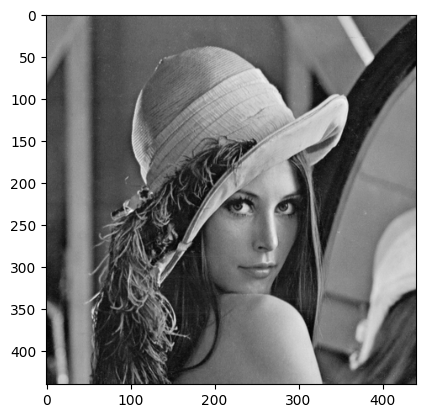

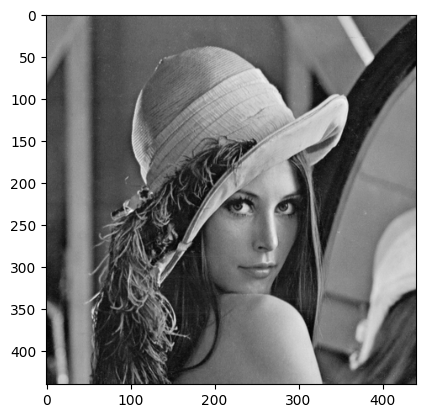

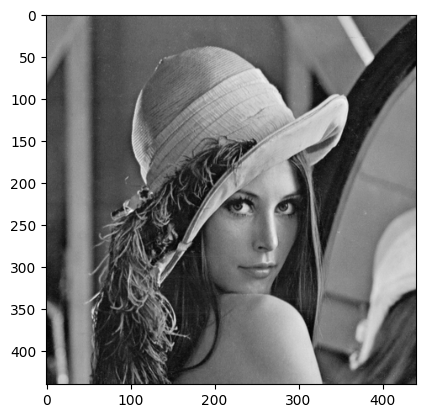

In [12]:
img = cv.imread('lena.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

In [13]:
def make_noise(img, noise_size, is_normal):
    noise = np.zeros(img.shape)
    if is_normal:
        cv.randn(noise, 0,  noise_size)
    else:
        cv.randu(noise, -noise_size, noise_size)
    return noise

def make_noise_img(img, noise_size, is_normal):
    return np.uint8(np.clip(cv.add(np.float64(img), make_noise(img, noise_size, is_normal)), 0, 255))

def make_filtered_img(noise_img, filter_name, kernel_elem):
    if filter_name == "Gaussian":
        return cv.blur(noise_img, (kernel_elem, kernel_elem))
    elif filter_name == "Median":
        if kernel_elem % 2 == 0:
            kernel_elem += 1
        return cv.medianBlur(noise_img, kernel_elem)
    elif filter_name == "Filter2D":
        return cv.filter2D(noise_img, cv.CV_8U, np.ones((kernel_elem, kernel_elem), dtype = np.float64) / (kernel_elem * kernel_elem))
    elif filter_name == "Sobel":
        if kernel_elem % 2 != 1:
            kernel_elem += 1
        return cv.Sobel(cv.blur(noise_img, (kernel_elem, kernel_elem)), cv.CV_64F, 1, 1, ksize = kernel_elem)
    elif filter_name == "Laplacian":
        if kernel_elem % 2 != 1:
            kernel_elem += 1
        return cv.Laplacian(cv.blur(img, (kernel_elem, kernel_elem)), cv.CV_64F, ksize=kernel_elem)
    else:
        return None

is_normal = True
noise_size = 40
kernel_size = 3
filter_names = list(("Gaussian", "Median", "Filter2D", "Sobel", "Laplacian"))
filter_type = 0

noise_img = make_noise_img(img, 40, True)
filtered_img = make_filtered_img(noise_img, filter_names[filter_type], kernel_size)

In [14]:
def update():
    global filtered_img
    filtered_img = make_filtered_img(noise_img, filter_names[filter_type], kernel_size)
    cv.imshow("Filtered Pic", filtered_img)
    cv.imshow("Noise Pic", noise_img)

def change_noise(val):
    global noise_img
    global noise_size
    noise_size = val
    noise_img = make_noise_img(img, noise_size, is_normal)
    update()

def change_is_normal(val):
    global noise_img
    if val == 1:
        is_normal = True
    else:
        is_normal = False
    noise_img = make_noise_img(img, noise_size, is_normal)
    update()

def change_kernel_size(val):
    global kernel_size
    global filtered_img
    if val > 0:
        kernel_size = val
        update()

def change_filter_type(val):
    global filtered_img
    global filter_type
    filter_type = val
    update()

In [15]:
cv.imshow("Filtered Pic", img)
cv.createTrackbar("Type of Filter","Filtered Pic", 0, 4, change_filter_type)
cv.createTrackbar("Filters kernel size", "Filtered Pic", 3, 30, change_kernel_size)
cv.imshow("Noise Pic", noise_img)
cv.createTrackbar("noise size", "Noise Pic", 40, 800, change_noise)
cv.createTrackbar("normal/uniform", "Noise Pic", 1, 1, change_is_normal)
cv.waitKey(0)
cv.destroyAllWindows()